In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
c = 299792458
lambda v: 1 / (1 - v**2 / c**2) ** 0.5

<function __main__.<lambda>(v)>

/tmp/ipykernel_1247/3919305425.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  plt.scatter(x=x, y=list(map(lambda v: 1/(1 - v**2 / c**2)**0.5, x)))


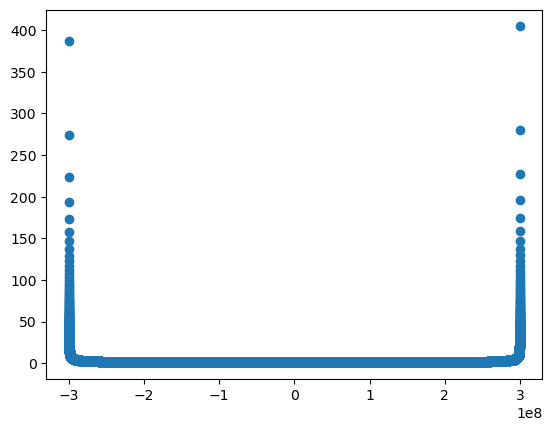

In [7]:
x = np.arange(-c, c + 1, 1e3)
plt.scatter(x=x, y=list(map(lambda v: 1 / (1 - v**2 / c**2) ** 0.5, x)))

# Planetary Motion

Newton's law of gravitation states that two bodies of mass attract each other with equal and opposite force that varies as the inverse of the square of the distance between them, with proportionality constant $G=6.6743 \times 10^{-11} \frac{N \cdot m}{kg^2}.$

\begin{equation}
    F = G \frac{m_1m_2}{r^2}
\end{equation}

## Single Planet Orbiting Some Star

- Assume the Sun has only one planet, such that the orbit of the planet is affected only by the Sun's gravity.
- Also assume the planet's mass is negligible compared to the Sun such that the Sun doesn't move. I.e. the barycenter of the Sun and the planet is at the same location as the Sun's center of mass. <br><br>

Since the green triangle and triangle ABC are similar, the proportions $|F_x|/F$ and $|x|/r$ are equal. $F_x$ is the x-component force acting on the planet and $x$ is the x-position of the planet with the origin at the Sun. When the planet is on the "right" side of the Sun, the x-component force pulls left and vice versa. So we have a negative sign in front of $x$. 

<img src="fig2.png" alt="alt text" title="Title" width="600" height="300">

Plugging in the law of gravitation for $F$ we have expressions for the x and y components of force acting on the planet, where $r = \sqrt{x^2 + y^2}$ is the distance between the Sun and the planet. Since there are only two bodies, the problem is 2-dimensional and we need not worry about z components.
\begin{align*}
    F_x &= - \frac{xF}{r} 
        &= -G\frac{m_{sun} m_{planet} x}{r^3} 
\end{align*}

\begin{align*}
    F_y &= - \frac{yF}{r} 
        &= -G\frac{m_{sun} m_{planet} y}{r^3}  
\end{align*}

Newton's 2nd law states that the time-rate-of-change of an object's momentum is proportional to the force acting on it, $F = \frac{d}{dt}(mv) = ma$. Substituting this into the LHS and canceling out the planet's mass give expressions for the acceleration of the planet around the Sun at any given position:

\begin{align*}
    a_x &= -G\frac{m_{sun} x}{r^3} 
\end{align*}

\begin{align*}
    a_y &= -G\frac{m_{sun} y}{r^3}  
\end{align*}

We can use these last two expressions to trace the planet's orbit numerically. First we define some initial conditions:

\begin{align*}
    &x(0), y(0) = x_0, y_0 \\
    &v_x(0), v_y(0) = v_{x, 0}, v_{y, 0} \\
    &r_0 = \sqrt{x_0^2 + y_0^2} \\
    &a_x(0) = -G \frac{m_{sun} x_0}{r_0^3} \\
    &a_y(0) = -G \frac{m_{sun} y_0}{r_0^3} \\
\end{align*}

Then to make one step in the simulation, we say:

\begin{align*}
    &x(t + \Delta t) = x(t) + v_{x, est} \Delta t \\
    &y(t + \Delta t) = y(t) + v_{y, est} \Delta t \\
\end{align*}

Where $v_{x, est}$ and $v_{y, est}$ are estimates of the x and y velocity between time $t$ and $\Delta t$ - for example, the velocities at the half-way point:

\begin{align*}
    & v_{x, est} = v_x \left(\frac{t + \Delta t}{2} \right) = v_x(t) + a_x(t) \frac{\Delta t}{2} \\
    & v_{y, est} = v_y \left(\frac{t + \Delta t}{2} \right) = v_y(t) + a_y(t) \frac{\Delta t}{2} \\
\end{align*}

With $x(t + \Delta t)$ and $y(t + \Delta t)$ in hand, we finish the iteration by calculating $r(t + \Delta t)$, $a_x(t + \Delta t)$ and $a_y(t + \Delta t)$, and then repeat for as many iterations as we'd like. However in order for the planet to achieve a stable orbit around the Sun, it must be circling fast enough (with tangential velocity $v$) such that its centrifugal acceleration (acting away from the Sun) is balanced by the gravitational acceleration exerted by the Sun on the planet at the distance where the planet is $R$. The centrifugal force (which is just the mass of the planet times the centrifugal acceleration) is not really a real force, but a fictitious one that appear to exist, acting away from the Sun, when the Sun and the planet are viewed from a rotating frame of reference. This centrifugal acceleration is $\omega^2 R$, or $v^2 / R$ since $\omega = v/R$, and we can equate it to the gravitational acceleration exerted by the Sun on the planet at distance R:

\begin{align*}
    &v^2/R = Gm_{sun}/R^2 \\
    &v = \sqrt{\frac{Gm_{sun}}{R}}
\end{align*}

Thus if we want our planet to achieve stable orbit at some $r_0$, we need to set $v_0 = \sqrt{\frac{Gm_{sun}}{r_0}} = \sqrt{v_{x, 0}^2 + v_{y, 0}^2}$.

In [4]:
G = 6.6743e-11  # Nm/kg^2
m_sun = 1.99e30  # kg
delta_t = 60  # seconds


def step(x, y, vx, vy, r, ax, ay):
    vx += ax * delta_t / 2
    vy += ay * delta_t / 2
    x += vx * delta_t
    y += vy * delta_t
    r = (x**2 + y**2) ** 0.5
    ax, ay = -G * m_sun * x / r**3, -G * m_sun * y / r**3
    return x, y, vx, vy, r, ax, ay


# pick some initial conditions
x0, y0 = -1.5e11, 0
r0 = (x0**2 + y0**2) ** 0.5
vx0, vy0 = 0, (G * m_sun / r0) ** 0.5

ax0, ay0 = -G * m_sun * x0 / r0**3, -G * m_sun * y0 / r0**3

# simulate one year
trajectory = [(x0, y0, vx0, vy0, r0, ax0, ay0)]
n_steps = 365 * 24 * 60 * 5

for _ in range(n_steps):
    trajectory.append(step(*trajectory[-1]))
trajectory = pd.DataFrame(trajectory, columns=["x", "y", "vx", "vy", "r", "ax", "ay"])
trajectory.index.name = "time (s)"
trajectory = trajectory[trajectory.index % (24 * 60) == 0]  # where the planet is daily
trajectory

,x,y,vx,vy,r,ax,ay
time (s),,,,,,,
0,-1.500000e+11,0.000000e+00,0.000000,29756.631754,1.500000e+11,0.005903,-0.000000
1440,-1.499890e+11,2.570910e+09,254.986725,29754.448111,1.500110e+11,0.005901,-0.000101
2880,-1.499559e+11,5.141443e+09,509.823792,29747.897355,1.500440e+11,0.005896,-0.000202
4320,-1.499009e+11,7.711221e+09,764.361852,29736.989090,1.500991e+11,0.005887,-0.000303
5760,-1.498238e+11,1.027987e+10,1018.452318,29721.739288,1.501761e+11,0.005875,-0.000403
...,...,...,...,...,...,...,...
2622240,1.510623e+12,9.981745e+11,8202.350428,2465.130011,1.810617e+12,-0.000034,-0.000022
2623680,1.511332e+12,9.983875e+11,8200.890721,2464.165604,1.811326e+12,-0.000034,-0.000022
2625120,1.512040e+12,9.986004e+11,8199.432042,2463.202122,1.812034e+12,-0.000034,-0.000022


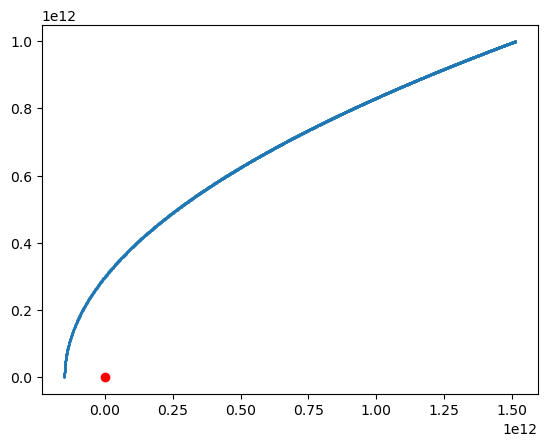

In [6]:
frame = 1826
plt.scatter(x=[0], y=[0], c="red", label="Sun")
plt.scatter(x=trajectory.x.values[:frame], y=trajectory.y.values[:frame], s=1)

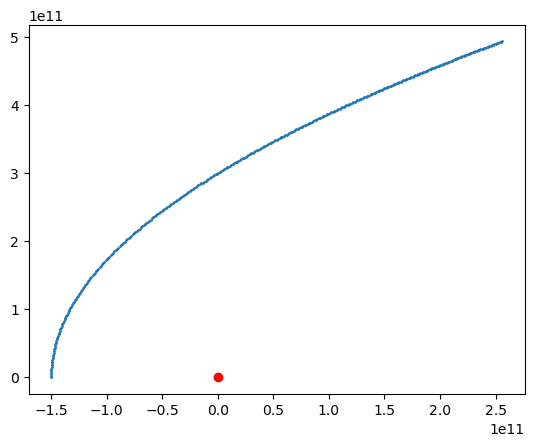

In [ ]:
frame = 365 * 10
plt.scatter(x=[0], y=[0], c="red", label="Sun")
plt.scatter(x=trajectory.x.values[:frame], y=trajectory.y.values[:frame], s=1)

In [26]:
trajectory["x"].iloc[:4]

time (s)
0         1.000000e+00
86400    -5.737762e+24
172800   -1.147552e+25
259200   -1.721329e+25
Name: x, dtype: float64

In [16]:
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
from matplotlib.animation import FuncAnimation

<Figure size 640x480 with 0 Axes>

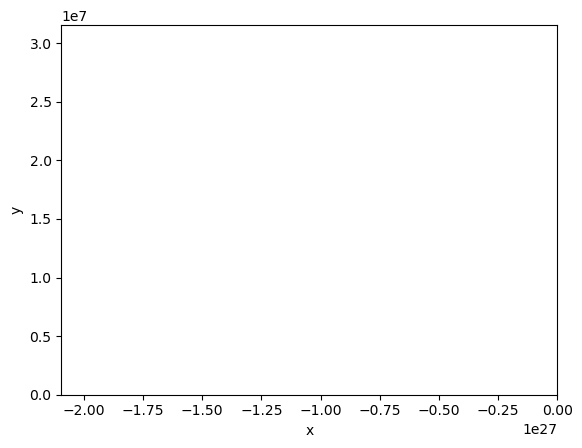

In [25]:
def update(frame):
    plt.clf()
    plt.plot(trajectory["x"].iloc[:frame], trajectory["y"].iloc[:frame], marker="o")
    plt.xlim(min(trajectory.x), max(trajectory.x))
    plt.ylim(min(trajectory.y), max(trajectory.y))
    plt.xlabel("x")
    plt.ylabel("y")


frame_slider = widgets.IntSlider(min=0, max=len(trajectory), step=1)
ani = FuncAnimation(plt.gcf(), update, frames=len(trajectory), interval=1, repeat=False)
display(widgets.HBox([frame_slider, widgets.Label(value="Adjust frame:")]))
display(plt.gcf())